# 4. Tutorial 2: Python Basics 2

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### April 18, 2024

In [1]:
import numpy as np
from IPython.display import Image

## 1. Control flow (制御フロー) (continued from last lecture)

### 1-1. Functions

#### Function definitions start with `def`, which is followed by the name of the functions and some parameter names enclosed in parentheses, and ends with a colon.
#### A body of a function definition consists of one or more Python statements, each indented the same amount – 4 spaces is the Python standard – from the header line.
#### Values are returned by `return` keyword and comma-separated return-values are treated as tuples.

In [2]:
def f(x,y):
    z1 = x + y
    z2 = x - y
    return z1, z2

In [3]:
f(0.1, 0.2)

(0.30000000000000004, -0.1)

#### You can unpack the multiple return values and assign them to separate variables.

In [4]:
t1, t2 = f(0.1, 0.2)
t1

0.30000000000000004

#### By using `[]`, you can return a list instead of a tuple.

In [5]:
def g(x,y):
    z1 = x + y
    z2 = x - y
    return [z1, z2]

g(1,2)

[3, -1]

#### Note that variables defined inside a function have no effect outside the function in order to avoid name conflicts.
#### In the example below, the value of $y$ has not been changed by calling two functions, f(.) and g(.).

In [6]:
# example
y = 1

def f(x):
    y = x**2
    return y

def g(x):
    y = x**4
    return y

r1 = y
r2 = f(2)
r3 = g(2)
r1, r2, r3

(1, 4, 16)

#### Positional arguments and keyword arguments can be combined.

In [7]:
def f(x, y, α=0.9, β=4.0):
    return α*x +β*y

In [8]:
f(0.1, 0.2)

0.89

#### By prefixing a parameter with `*`, such as `*x`, in the function definition, a function can accept any number of multiple arguments as a tuple. 
#### It is useful in the case of a function that calculates the sum of multiple arguments, whose number of arguments may vary: variable-length argument (可変長引数).

In [9]:
def f(*x):
    print('arguments: ', x)
    print('type: ', type(x))
    print('sum : ', sum(x))
#    return sum(x)

f(1,2,3,4)

arguments:  (1, 2, 3, 4)
type:  <class 'tuple'>
sum :  10


#### You can get the same result by using list. However, notice that if you change the list of arguments inside the function, the list outside the fuction will also change.

In [10]:
def f_list(x):
    print('arguments: ', x)
    print('type: ', type(x))
    print('sum : ', sum(x))
    x[2] = 0
#    return sum(x)

parm_list=[1, 2, 3, 4]
print(f_list(parm_list))
print(parm_list)

arguments:  [1, 2, 3, 4]
type:  <class 'list'>
sum :  10
None
[1, 2, 0, 4]


### 1-2. Docstrings

#### A function can be documented with a string documentation, docstrings, which appear right after the definition of the functions and provides a convenient way of associating documentation with Python modules, functions, classes, and methods.

In [11]:
def f(x, y, α=0.9, β=4.0):
    """This function computes sum of degree 1 polynominal in two variables.
    
    Parameters:
    ----------
    x (int) : explanation of the first variable
    y (int) : explanation of the second variable
    
    Returns:
    ----------
    int : sum of the polynominal
    """
    return α*x +β*y

In [12]:
f(0.1, 0.2)

0.89

In [13]:
f?

Signature: f(x, y, α=0.9, β=4.0)
Docstring:
This function computes sum of degree 1 polynominal in two variables.

Parameters:
----------
x (int) : explanation of the first variable
y (int) : explanation of the second variable

Returns:
----------
int : sum of the polynominal
File:      c:\users\tanin\appdata\local\temp\ipykernel_24004\4213866802.py
Type:      function


### 1-3. Functions are first-class objects (第一級オブジェクト)
#### A programming language is said to support first-class functions if it treats functions as first-class objects. Python supports the concept of First Class functions. That is, functions behave like any other object, such as an int or a list. 

#### Properties of first class functions:
 * A function is an instance of the Object type.
 * You can store the function in a variable.
 * You can pass the function as an argument to another function.
 * You can return the function from a function.

In [14]:
def f(x):
    return 2*x*(1-x)

#### ・ Example of storing a function in a variable:
#### Instead of calling function $f(x)$, it is stored in the variable $g$.
#### To call the function, you must pass the function parameter value $x$ to the parenthesis that follows $g$.

In [15]:
g = f
g(1.2)

-0.47999999999999987

#### ・ Example of passing a function as an argument to another function:
#### You can pass functions as arguments to other functions. Functions that can take other functions as arguments are called higher-order functions (高階関数). 

In [16]:
def h(x):
    return x(10)

h(f) # == f(10)

-180

#### ・Example of returning a function from another function:
#### In the following example, $k(.)$ returns $l(.)$.

In [17]:
def k(x):
    def l(y):
        return x+y+5
    return l #return another function

k10 = k(10)
k10(5)

20

### 1-4. Anonymous functions (無名関数)
#### Anonymous functions in Python are also known as `labmda` functions. They are small specific functions that perform limited tasks, and immediately stored in a variable or input to higher-order functions such as `map(.)`, `sorted(.)`, or `filter(.)`.
#### ・Example 1: `map(.)`

In [18]:
y = lambda i: i*2
y(10)

20

In [19]:
# Using standard functions
def f(x):
    return x**x

list(map(f, range(1,10)))
# The map function applies a function to each member of a collection

[1, 4, 27, 256, 3125, 46656, 823543, 16777216, 387420489]

In [20]:
# Using standard functions
print(list(map(lambda x: x**x, range(1,10))))

[1, 4, 27, 256, 3125, 46656, 823543, 16777216, 387420489]


#### ・Example 2: `sorted(.)`

In [21]:
# The sorted function sorts the values in order of "key" parameter.
sorted(range(-5,5), key=abs) #in order or absolute value

[0, -1, 1, -2, 2, -3, 3, -4, 4, -5]

In [22]:
sorted(range(-5,5), key=lambda x:x**2)

[0, -1, 1, -2, 2, -3, 3, -4, 4, -5]

In [23]:
sorted(range(1,5), key=lambda x:(-2)**x)

[3, 1, 2, 4]

#### ・Example 3: `filter(.)`

In [24]:
list(filter(lambda x: x**2>5, range(5)))
# The filter function extract all the member of a collection that satisfy the specific conditions.

[3, 4]

## 2. Object-oriented programming (OOP) in Python
### 2-1. Object-oriented programming (OOP、オブジェクト指向プログラミング) and procedural programming (プロセス指向プログラミング)

#### Procedural programming is a programming paradigm in which statements are executed one after another in a linear sequence.
#### Although you can use functions to improve reusability, they are typically limited to use within the same program: functions are not as reusable as classes and objects in object-oriented programming.
#### ・Example of procedural programming in Python:

In [25]:
def construct(words):
    sentence = ''
    for c in words:
        sentence = sentence + ' ' + c
    return sentence[1:]

pen = ['This','is','a','pen.']
construct(pen)

'This is a pen.'

In [26]:
# When you extend the function, you need to re-define the original function.
def construct_my(words):
    words = [i.replace('a','my') for i in words] 
    sentence = ''
    for c in words:
        sentence = sentence + ' ' + c
    return sentence[1:]

construct_my(pen)

'This is my pen.'

#### In the OOP paradigm, data and functions are bundled together into `objects` in `classes`, which improves code reusability.
#### ・Example of OOP in Python

In [27]:
class ConstructOOP:
    def __init__(self, words):
        self.words = words
    def construct(self):
        self.sentence = ' '.join(self.words)

pen = ['This','is','a','pen.']
pen_ex = ConstructOOP(pen)
pen_ex.construct()
pen_ex.sentence

'This is a pen.'

In [28]:
# When you extend the function, you can use inheritance of superclasses, which will be detailed later.
class ConstructOOP_my(ConstructOOP):
    def __init__(self, words):
        super().__init__(words)
        self.words = [i.replace('a','my') for i in self.words]
        # you can avoid redefining instance variables and functions of the superclass.

pen_ex = ConstructOOP_my(pen)
pen_ex.construct()
pen_ex.sentence

'This is my pen.'

#### Python supports both paradigms.
#### If your project requires only a simple sequential manipulation, procedural programming may be less expensive in terms of time and effort.
#### If you deal with more complex model, which has a bunch of interrelated objects and needs abstraction especially in simulation, OOP will be useful.

### 2-2. Classes and objects in depth

#### The `class` is a user-defined data structure which defines how to build a certain kind of `object`. That is, `class` is a blueprint or code template to create `object`. (クラスはオブジェクトを生成するためのひな型のイメージ)
#### The `object` is a datatype that stores **attributes** (data, variables) and **methods** (operations, functions attached to attributes). (「属性」と「メソッド」と呼ばれる)

In [29]:
# By convention, user-defined class names start with a capital letter.
class Prefecture:                         #Beginning of the class definition
    """A class representing prefectural 
       statistics in 2014"""              #Docstring
    region_name = 'Shikoku'               #creating class variables
    def __init__(self, name, pop, gdp):   #__init__() is the constructor (コンストラクタ) to create and initialize an object of the class. The constructor sets the state of the object's attributes (instance variables). 
                                          #In __init__(), "self" refers to the object currently being created. Although you must specify "self" explicitly when defining the method, you do not include it when calling the method.
        self.name = name                  #creating instance variables: attributes
        self.population = pop
        self.gdp = gdp
    def gdp_per_capita(self):             #creating an instance method to calculate prefectural gdp per capita
        return self.gdp / self.population

#### The non-method data stored by objects are **attributes**.
#### There are two kinds of attributes: **instance attributes** and **class attributes**.
##### ・**Instance attributes**: Variables owned by a particular instance of the class. Each instance has its own value. You define instance attributes in the constructor (`__init__()` method of a class).
##### ・**Class attributes**: Variables owned by the class as a whole. All instances in the class share the same value. They are defined inside of class, but outside of any method.

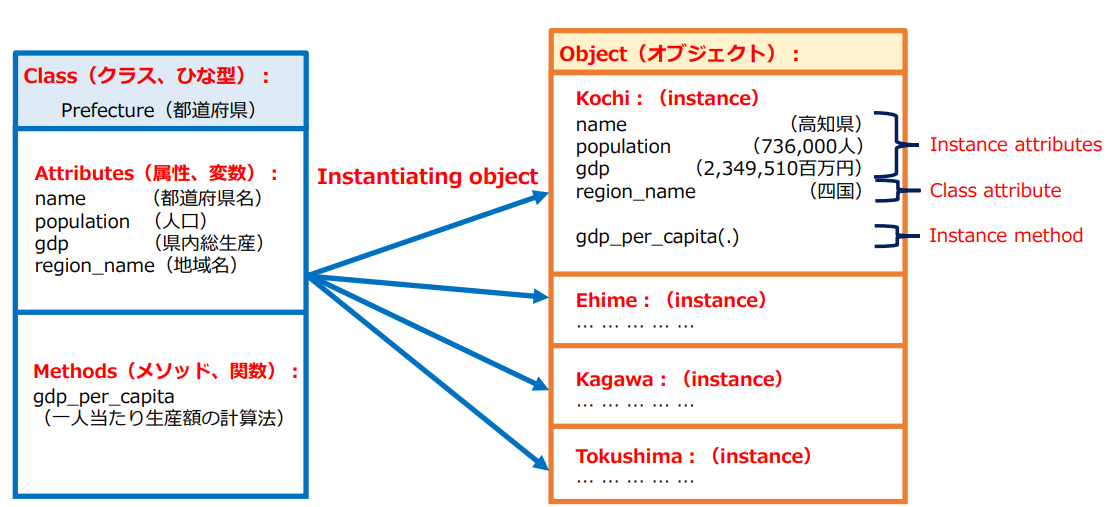

In [30]:
Image(filename="classs_objects.png", height=900, width=1100)

In [31]:
#Instantiating objects: create instances of the class
kochi = Prefecture('Kochi',736000,2349510000000)

ehime = Prefecture('Ehime',1396000,4756495000000)
kagawa = Prefecture('Kagawa',980000,3672273000000)
tokushima = Prefecture('Tokushima',763000,3012328000000)

# call instance variables: attributes
print(f'{kochi.name}: {kochi.gdp}')
print(f'{kagawa.name}: {kagawa.gdp}')

# call class variables
print(f'Region: {kochi.region_name}')
# call methods
kochi.gdp_per_capita()
kagawa.gdp_per_capita()

Kochi: 2349510000000
Kagawa: 3672273000000
Region: Shikoku


3747217.3469387754

### 2-3. Inheritance (継承)

#### You can extend the definition of classes by using inheritance, which allows you to avoid redefining the same methods several times.
#### You can make a subclass by putting the name of the superclass in parentheses right after the subclass's name.
#### In the example below, you will add a method to calculate prefectural income per capita to the "Prefecture" class.

In [32]:
class Prefecture_add(Prefecture):               #superclass is in parenthesis
    """A new class representing prefectural 
       statistics in 2014"""                    #Docstring
    def __init__(self, name, pop, gdp, income): #constructor, containing attirbutes of the superclass and additional attributes in the subclass 
        super().__init__(name, pop, gdp)        #call the constructor of the superclass
        self.income = income                    #creating a new instance variable: attribute
        
    def income_per_capita(self):             #creating a new instance method to calculate prefectural income per capita
        return self.income / self.population
        # you can avoid redefining instance variables and functions of the superclass. It is also possible to call the method of the superclass without redefining it.

In [33]:
# create instances of the class
kochi = Prefecture_add('Kochi',736000,2349510000000,1866110000000)

ehime = Prefecture_add('Ehime',1396000,4756495000000,3516676000000)
kagawa = Prefecture_add('Kagawa',980000,3672273000000,2835364000000)
tokushima = Prefecture_add('Tokushima',763000,3012328000000,2219318000000)

# call instance variables: attributes
print(f'{kochi.name}: {kochi.gdp}')
print(f'{kagawa.name}: {kagawa.gdp}')

# call class variables
print(f'Region: {kochi.region_name}')
# call new methods
kochi.income_per_capita()
kagawa.income_per_capita()

Kochi: 2349510000000
Kagawa: 3672273000000
Region: Shikoku


2893228.5714285714

In [34]:
kochi.population
kochi.gdp
kochi.gdp_per_capita()

3192269.0217391304

## 3. Exercise

#### $\mathit{Q}$-1. Compute Theil's $T$ by using OOP. (see $\mathit{Q}$-2 of the practice mini exam)

#### Suppose that a hypothetical economy consists of two groups with 15 people each. 
#### Personal income data for both groups ($G1$ and $G2$) are defined as follows:

#### $$G1: [1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 6, 8, 10]$$
#### $$G2: [1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6, 7, 8]$$


#### $$T_T = \frac{1}{N}\sum^{N}_{i=1}\frac{x_i}{\bar{x}}\ln \frac{x_i}{\bar{x}}$$